### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('russia.csv')

In [3]:
df.head(10)

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,3291.14,246.07,3059.20,3318.39,2073.87,7777591.0,N.A.
1,03JAN2020_00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02:00 - 02:30,3073.80,28.73,3059.20,3074.51,3057.36,1801.0,N.A.
3,02:30 - 03:00,3071.34,-2.46,3073.72,3075.41,3070.58,1799.0,N.A.
4,03:00 - 03:30,3080.40,9.06,3071.61,3080.56,3070.95,1793.0,N.A.
5,03:30 - 04:00,3085.01,4.61,3080.37,3085.01,3079.32,1799.0,N.A.
6,04:00 - 04:30,3083.29,-1.72,3085.38,3085.57,3081.05,1800.0,N.A.
7,04:30 - 05:00,3084.07,0.78,3083.37,3086.07,3082.44,1800.0,N.A.
8,05:00 - 05:30,3083.35,-0.72,3084.09,3086.03,3082.20,1800.0,N.A.
9,05:30 - 06:00,3084.51,1.16,3083.38,3085.46,3083.08,1799.0,N.A.


In [4]:
df=df.dropna()

In [5]:
df.head(10)

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,3291.14,246.07,3059.20,3318.39,2073.87,7777591.0,N.A.
2,02:00 - 02:30,3073.80,28.73,3059.20,3074.51,3057.36,1801.0,N.A.
3,02:30 - 03:00,3071.34,-2.46,3073.72,3075.41,3070.58,1799.0,N.A.
4,03:00 - 03:30,3080.40,9.06,3071.61,3080.56,3070.95,1793.0,N.A.
5,03:30 - 04:00,3085.01,4.61,3080.37,3085.01,3079.32,1799.0,N.A.
6,04:00 - 04:30,3083.29,-1.72,3085.38,3085.57,3081.05,1800.0,N.A.
7,04:30 - 05:00,3084.07,0.78,3083.37,3086.07,3082.44,1800.0,N.A.
8,05:00 - 05:30,3083.35,-0.72,3084.09,3086.03,3082.20,1800.0,N.A.
9,05:30 - 06:00,3084.51,1.16,3083.38,3085.46,3083.08,1799.0,N.A.
10,06:00 - 06:30,3080.95,-3.56,3084.54,3086.09,3080.26,1800.0,N.A.


In [6]:
# df.index=[i for i in range(len(df))] or df.reset_index(inplace=True) to make indices in 1,2,3 order
df.head(10)
# print(df.loc[0])

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,3291.14,246.07,3059.20,3318.39,2073.87,7777591.0,N.A.
2,02:00 - 02:30,3073.80,28.73,3059.20,3074.51,3057.36,1801.0,N.A.
3,02:30 - 03:00,3071.34,-2.46,3073.72,3075.41,3070.58,1799.0,N.A.
4,03:00 - 03:30,3080.40,9.06,3071.61,3080.56,3070.95,1793.0,N.A.
5,03:30 - 04:00,3085.01,4.61,3080.37,3085.01,3079.32,1799.0,N.A.
6,04:00 - 04:30,3083.29,-1.72,3085.38,3085.57,3081.05,1800.0,N.A.
7,04:30 - 05:00,3084.07,0.78,3083.37,3086.07,3082.44,1800.0,N.A.
8,05:00 - 05:30,3083.35,-0.72,3084.09,3086.03,3082.20,1800.0,N.A.
9,05:30 - 06:00,3084.51,1.16,3083.38,3085.46,3083.08,1799.0,N.A.
10,06:00 - 06:30,3080.95,-3.56,3084.54,3086.09,3080.26,1800.0,N.A.


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1

0       3291.14
1       3073.80
2       3071.34
3       3080.40
4       3085.01
         ...   
4493    3287.18
4494    3290.07
4495    3293.35
4496    3292.64
4497    3291.14
Name: Close, Length: 4498, dtype: float64

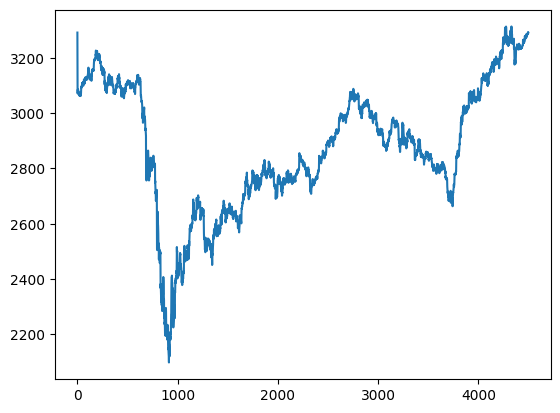

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
import numpy as np

In [12]:
df1

0       3291.14
1       3073.80
2       3071.34
3       3080.40
4       3085.01
         ...   
4493    3287.18
4494    3290.07
4495    3293.35
4496    3292.64
4497    3291.14
Name: Close, Length: 4498, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.98187433]
 [0.80289055]
 [0.8008647 ]
 ...
 [0.98369431]
 [0.98310961]
 [0.98187433]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(2923, 1575)

In [17]:
train_data

array([[0.98187433],
       [0.80289055],
       [0.8008647 ],
       ...,
       [0.73411842],
       [0.73271844],
       [0.73749485]])

In [18]:
test_data

array([[0.73861484],
       [0.740196  ],
       [0.73959483],
       ...,
       [0.98369431],
       [0.98310961],
       [0.98187433]])

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(2822, 100)
(2822,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(1474, 100)
(1474,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
print(X_train.shape)

(2822, 100, 1)


In [25]:
# pip install tensorflow

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
45/45 [==============================] - 60s 645ms/step - loss: 0.0282 - val_loss: 0.0015
Epoch 2/100
45/45 [==============================] - 21s 466ms/step - loss: 0.0011 - val_loss: 4.3522e-04
Epoch 3/100
45/45 [==============================] - 22s 488ms/step - loss: 8.1170e-04 - val_loss: 6.8561e-04
Epoch 4/100
45/45 [==============================] - 22s 491ms/step - loss: 8.1061e-04 - val_loss: 3.6226e-04
Epoch 5/100
45/45 [==============================] - 24s 543ms/step - loss: 7.5621e-04 - val_loss: 3.4963e-04
Epoch 6/100
45/45 [==============================] - 25s 551ms/step - loss: 7.7050e-04 - val_loss: 3.1905e-04
Epoch 7/100
45/45 [==============================] - 22s 483ms/step - loss: 7.3088e-04 - val_loss: 3.7835e-04
Epoch 8/100
45/45 [==============================] - 22s 484ms/step - loss: 7.3443e-04 - val_loss: 3.0057e-04
Epoch 9/100
45/45 [==============================] - 22s 500ms/step - loss: 6.9540e-04 - val_loss: 2.7964e-04
Epoch 10/100
45/45 [==

Epoch 75/100
45/45 [==============================] - 11s 244ms/step - loss: 1.9060e-04 - val_loss: 1.8549e-04
Epoch 76/100
45/45 [==============================] - 11s 242ms/step - loss: 1.5735e-04 - val_loss: 6.5689e-05
Epoch 77/100
45/45 [==============================] - 11s 243ms/step - loss: 1.4023e-04 - val_loss: 2.8840e-04
Epoch 78/100
45/45 [==============================] - 11s 243ms/step - loss: 1.6762e-04 - val_loss: 6.6895e-05
Epoch 79/100
45/45 [==============================] - 11s 248ms/step - loss: 1.5339e-04 - val_loss: 1.3888e-04
Epoch 80/100
45/45 [==============================] - 11s 244ms/step - loss: 1.7397e-04 - val_loss: 2.5659e-04
Epoch 81/100
45/45 [==============================] - 11s 246ms/step - loss: 1.7226e-04 - val_loss: 1.2221e-04
Epoch 82/100
45/45 [==============================] - 11s 247ms/step - loss: 1.4887e-04 - val_loss: 5.1758e-05
Epoch 83/100
45/45 [==============================] - 10s 222ms/step - loss: 1.6044e-04 - val_loss: 6.3144e-05
E

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.12.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

47/47 [==============================] - 1s 28ms/step


In [33]:
train_predict.shape

(2822, 1)

In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2803.596512058741

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2989.6211688493336

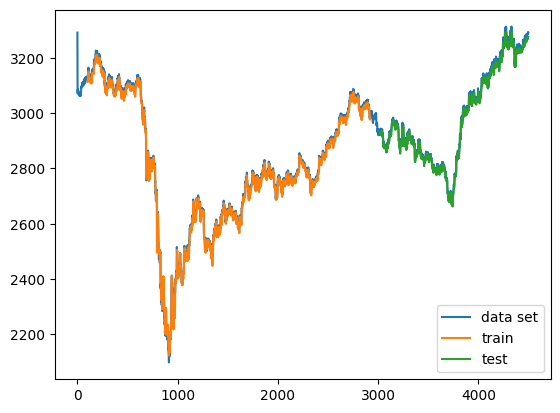

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data set','train','test'])
plt.show()

In [38]:
len(test_data)

1575

In [39]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.9367125092645971,
 0.9350242938318374,
 0.9317384501358807,
 0.9312525734991355,
 0.9336737214856297,
 0.9407230503170552,
 0.9410771637980728,
 0.9486453100551757,
 0.9457300502347028,
 0.9465041587746028,
 0.9410936341925389,
 0.9447335913695132,
 0.937848966482747,
 0.9398912953965244,
 0.9421971506217575,
 0.9411101045870045,
 0.934818413901013,
 0.9331137280737871,
 0.9397924730297289,
 0.940788931894919,
 0.9385818990364818,
 0.9375854401712922,
 0.936992505970518,
 0.9357160503994071,
 0.9376430865519225,
 0.9378983776661447,
 0.9341925389113066,
 0.9363007494029483,
 0.9344890060116939,
 0.9346701803508193,
 0.9359548711191632,
 0.9356748744132419,
 0.9353042905377582,
 0.9371736803096433,
 0.9366548628839659,
 0.9399571769743882,
 0.9395618875072058,
 0.9383430783167257,
 0.9393148315902167,
 0.9404348184139009,
 0.9421559746355923,
 0.9428724367948611,
 0.9430453759367534,
 0.9453100551758213,
 0.9464135716050399,
 0.9453759367536851,
 0.958255785226056,
 0.955933459606357

In [42]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9679657]
101
1 day input [0.93502429 0.93173845 0.93125257 0.93367372 0.94072305 0.94107716
 0.94864531 0.94573005 0.94650416 0.94109363 0.94473359 0.93784897
 0.9398913  0.94219715 0.9411101  0.93481841 0.93311373 0.93979247
 0.94078893 0.9385819  0.93758544 0.93699251 0.93571605 0.93764309
 0.93789838 0.93419254 0.93630075 0.93448901 0.93467018 0.93595487
 0.93567487 0.93530429 0.93717368 0.93665486 0.93995718 0.93956189
 0.93834308 0.93931483 0.94043482 0.94215597 0.94287244 0.94304538
 0.94531006 0.94641357 0.94537594 0.95825579 0.95593346 0.95860166
 0.95845343 0.95948283 0.9611381  0.9596393  0.95175821 0.95175821
 0.95319937 0.95138763 0.955357   0.95319114 0.95411348 0.95510994
 0.95792638 0.95949106 0.95975459 0.96737215 0.97177798 0.96569217
 0.96174751 0.96629334 0.96504159 0.96867331 0.96867331 0.96841802
 0.97117681 0.96893684 0.96764391 0.96835214 0.97030388 0.96927448
 0.96722392 0.96718274 0.96854978 0.97776497 0.97364737 0.97773203
 0.97508029 0.97372149 0.97583793 

8 day output [[0.9005193]]
9 day input [0.94650416 0.94109363 0.94473359 0.93784897 0.9398913  0.94219715
 0.9411101  0.93481841 0.93311373 0.93979247 0.94078893 0.9385819
 0.93758544 0.93699251 0.93571605 0.93764309 0.93789838 0.93419254
 0.93630075 0.93448901 0.93467018 0.93595487 0.93567487 0.93530429
 0.93717368 0.93665486 0.93995718 0.93956189 0.93834308 0.93931483
 0.94043482 0.94215597 0.94287244 0.94304538 0.94531006 0.94641357
 0.94537594 0.95825579 0.95593346 0.95860166 0.95845343 0.95948283
 0.9611381  0.9596393  0.95175821 0.95175821 0.95319937 0.95138763
 0.955357   0.95319114 0.95411348 0.95510994 0.95792638 0.95949106
 0.95975459 0.96737215 0.97177798 0.96569217 0.96174751 0.96629334
 0.96504159 0.96867331 0.96867331 0.96841802 0.97117681 0.96893684
 0.96764391 0.96835214 0.97030388 0.96927448 0.96722392 0.96718274
 0.96854978 0.97776497 0.97364737 0.97773203 0.97508029 0.97372149
 0.97583793 0.97665322 0.97528617 0.97820143 0.97928024 0.97974965
 0.97750968 0.97742732 0

16 day output [[0.84718144]]
17 day input [0.93311373 0.93979247 0.94078893 0.9385819  0.93758544 0.93699251
 0.93571605 0.93764309 0.93789838 0.93419254 0.93630075 0.93448901
 0.93467018 0.93595487 0.93567487 0.93530429 0.93717368 0.93665486
 0.93995718 0.93956189 0.93834308 0.93931483 0.94043482 0.94215597
 0.94287244 0.94304538 0.94531006 0.94641357 0.94537594 0.95825579
 0.95593346 0.95860166 0.95845343 0.95948283 0.9611381  0.9596393
 0.95175821 0.95175821 0.95319937 0.95138763 0.955357   0.95319114
 0.95411348 0.95510994 0.95792638 0.95949106 0.95975459 0.96737215
 0.97177798 0.96569217 0.96174751 0.96629334 0.96504159 0.96867331
 0.96867331 0.96841802 0.97117681 0.96893684 0.96764391 0.96835214
 0.97030388 0.96927448 0.96722392 0.96718274 0.96854978 0.97776497
 0.97364737 0.97773203 0.97508029 0.97372149 0.97583793 0.97665322
 0.97528617 0.97820143 0.97928024 0.97974965 0.97750968 0.97742732
 0.97861319 0.98099316 0.98369431 0.98310961 0.98187433 0.96796572
 0.95501047 0.9444062

24 day output [[0.80226743]]
25 day input [0.93789838 0.93419254 0.93630075 0.93448901 0.93467018 0.93595487
 0.93567487 0.93530429 0.93717368 0.93665486 0.93995718 0.93956189
 0.93834308 0.93931483 0.94043482 0.94215597 0.94287244 0.94304538
 0.94531006 0.94641357 0.94537594 0.95825579 0.95593346 0.95860166
 0.95845343 0.95948283 0.9611381  0.9596393  0.95175821 0.95175821
 0.95319937 0.95138763 0.955357   0.95319114 0.95411348 0.95510994
 0.95792638 0.95949106 0.95975459 0.96737215 0.97177798 0.96569217
 0.96174751 0.96629334 0.96504159 0.96867331 0.96867331 0.96841802
 0.97117681 0.96893684 0.96764391 0.96835214 0.97030388 0.96927448
 0.96722392 0.96718274 0.96854978 0.97776497 0.97364737 0.97773203
 0.97508029 0.97372149 0.97583793 0.97665322 0.97528617 0.97820143
 0.97928024 0.97974965 0.97750968 0.97742732 0.97861319 0.98099316
 0.98369431 0.98310961 0.98187433 0.96796572 0.95501047 0.94440621
 0.93594933 0.92884916 0.9220742  0.91510129 0.90786517 0.90051931
 0.89323705 0.886123

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

4498

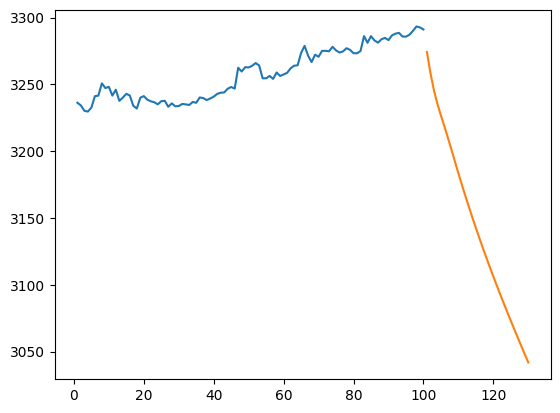

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

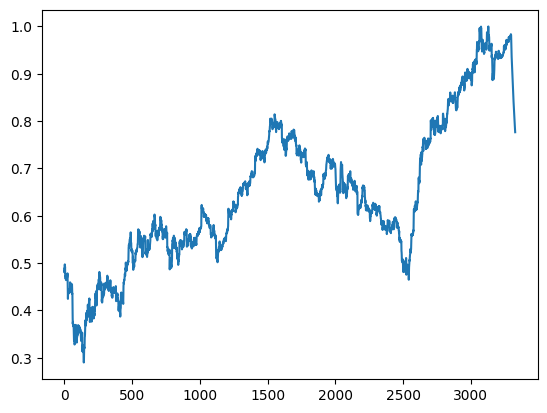

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

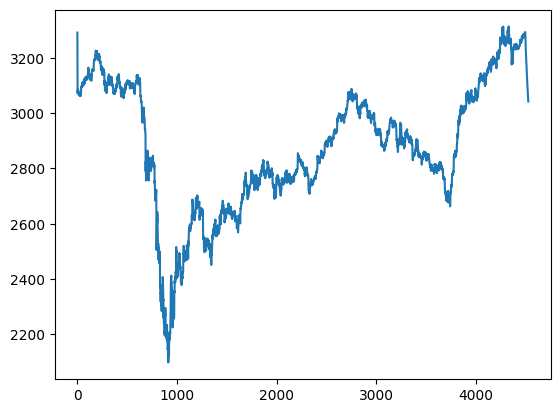

In [49]:
plt.plot(df3)